In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
X = pd.read_csv("Train.csv")
y = pd.read_csv("Train.csv")
X = X.values
y = y.values
X = X[:,:-1]
y = y[:,-1]

In [47]:
X

array([[ 0.29341624, -0.94559871, -0.42110515,  0.40681602,  0.52566183],
       [-0.83608408, -0.18922804, -0.77640262, -1.05383124,  0.59799685],
       [ 0.23642511,  0.13283602, -0.14772298,  0.69985396, -0.18736416],
       ...,
       [ 1.04417694, -0.89920649,  1.73039905, -1.87105676,  0.44251965],
       [-1.2691729 , -0.00505216,  1.85766873, -1.08036482,  0.73633394],
       [-1.88400025, -0.84942743, -1.45227035,  0.48861308,  1.4595758 ]])

In [48]:
y

array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])

In [49]:
u = np.mean(X,axis=0) # axis=0 for column wise and axis=1 for row wise
std = np.std(X,axis=0)
print(u.shape,std.shape)
X = (X-u)/std

(5,) (5,)


In [50]:
ones = np.ones((X.shape[0],1)) # For bias
#print(ones)
X = np.hstack((ones,X))
print(X.shape)
print(X[0].shape[0])

(1600, 6)
6


In [51]:
# X - Matrix (m x n [m features and n examples])
# x - Vector (Single Example with n features)
def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_ += (theta[i]*x[i])
    return y_
def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i]-y_)**2
    return e/m
def gradient(X,y,theta):
    m,n = X.shape
    grad = np.zeros((n,))
    
    # for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    # Out of the loops
    return grad/m
def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):  # epochs = iterations
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e=error(X,y,theta)
        error_list.append(e)
        
        # Gradient Descent
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
    return theta,error_list

In [52]:
import time
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken is", end-start)

Time taken is 13.466100215911865


In [53]:
print(theta)

[ 0.31883538 29.59359198 94.65067706  8.37544469 45.52303635  2.46461552]


<IPython.core.display.Javascript object>


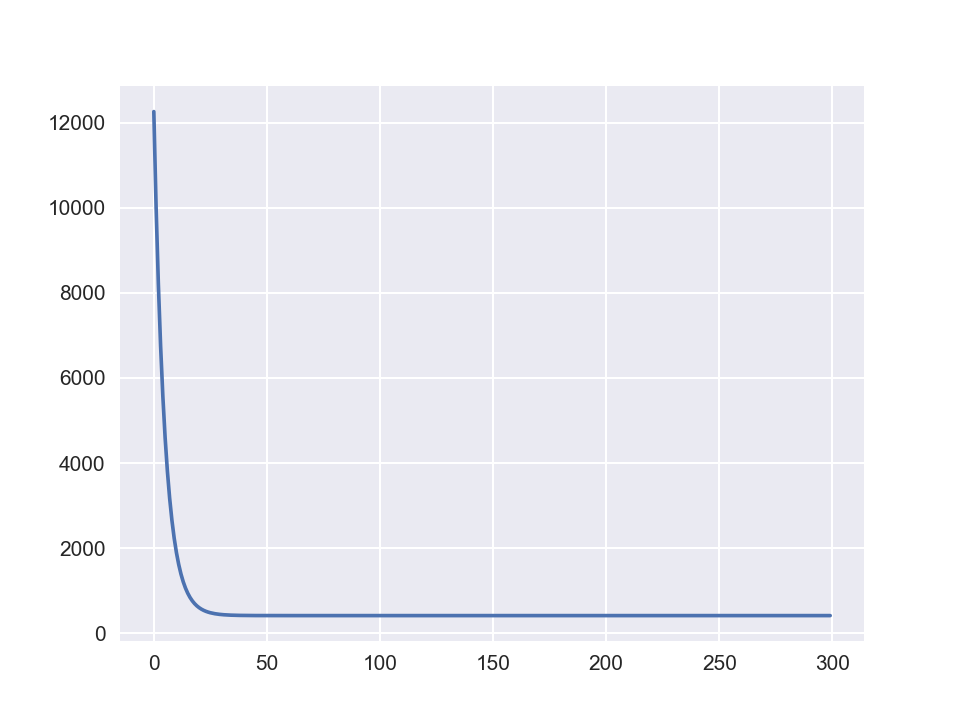

In [54]:
plt.plot(error_list)
plt.show()